In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import numpy as np

def find_left_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    left_boundary = None
    for col in range(width):
        for row in range(height):
            if any(image_array[row, col] < threshold):
                left_boundary = col
                #print("left_boundary = ", left_boundary)
                break
        if left_boundary is not None:
            break

    if left_boundary is None:
        left_boundary = 0

    return left_boundary

# Example usage:
# Assuming you have the image as a 3D NumPy array named 'image'
# left_boundary = find_left_boundary(image)


In [23]:
def find_right_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    right_boundary = None
    for col in range(width - 1, -1, -1):
        for row in range(height):
            if any(image_array[row, col] < threshold):
                right_boundary = col
                #print("right_boundary = ", right_boundary)
                break
        if right_boundary is not None:
            break

    if right_boundary is None:
        right_boundary = width - 1

    return right_boundary


In [24]:
def find_top_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    top_boundary = None
    for row in range(height):
        for col in range(width):
            if any(image_array[row, col] < threshold):
                top_boundary = row
                break
        if top_boundary is not None:
            break

    if top_boundary is None:
        top_boundary = 0

    return top_boundary

In [25]:
def find_bottom_boundary(image_array, threshold=235):
    height, width, _ = image_array.shape

    bottom_boundary = None
    for row in range(height - 1, -1, -1):
        for col in range(width):
            if any(image_array[row, col] < threshold):
                bottom_boundary = row
                break
        if bottom_boundary is not None:
            break

    if bottom_boundary is None:
        bottom_boundary = height - 1

    return bottom_boundary

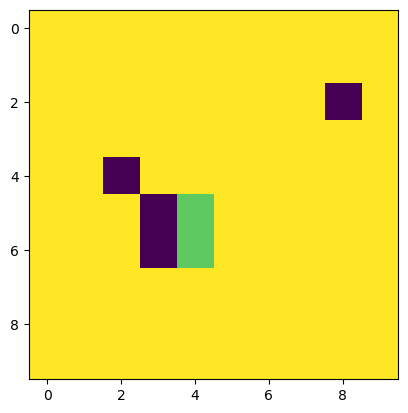

In [36]:
test_matrix = np.array([
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [200], [240]], #
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]], 
    [[240], [240], [200], [240], [240], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [200], [230], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [200], [230], [240], [240], [240], [240], [240]], #
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]],
    [[240], [240], [240], [240], [240], [240], [240], [240], [240], [240]]
])

plt.imshow(test_matrix)

In [27]:
threshold = 230

left_boundary = find_left_boundary(test_matrix, threshold)
print("Left Boundary:", left_boundary)

right_boundary = find_right_boundary(test_matrix, threshold)
print("Left Boundary:", right_boundary)

top_boundary = find_top_boundary(test_matrix, threshold)
print("top Boundary:", top_boundary)

bottom_boundary = find_bottom_boundary(test_matrix, threshold)
print("bottom Boundary:", bottom_boundary)

Left Boundary: 2
Left Boundary: 8
top Boundary: 2
bottom Boundary: 6


In [29]:
def crop_image(image_array, left_boundary, right_boundary, top_boundary, bottom_boundary):
    cropped_image = image_array[top_boundary:bottom_boundary+1, left_boundary:right_boundary+1, :]
    return cropped_image

# Example usage:
# Assuming you have the image as a 3D NumPy array named 'image'
# and you have already calculated the boundaries using the functions mentioned earlier

image = test_matrix

# Calculate the boundaries (assuming you have the threshold defined)
left_boundary = find_left_boundary(image, threshold)
right_boundary = find_right_boundary(image, threshold)
top_boundary = find_top_boundary(image, threshold)
bottom_boundary = find_bottom_boundary(image, threshold)

# Crop the image using the calculated boundaries
cropped_image = crop_image(image, left_boundary, right_boundary, top_boundary, bottom_boundary)

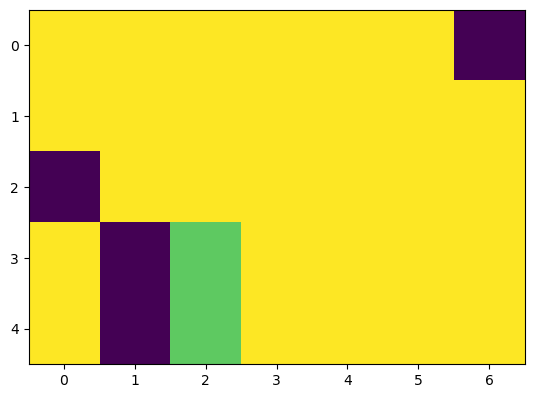

In [37]:
#display(cropped_image)
plt.imshow(test_matrix)
plt.imshow(cropped_image)

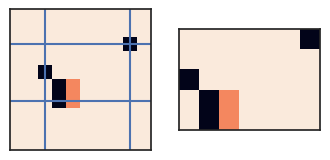

In [42]:
import seaborn as sns
sns.set_style("white")
_, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(image)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])


ax[1].imshow(cropped_image)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])

# ax.plot(39,5,marker = '*')
ax[0].axhline(y = top_boundary)
ax[0].axhline(y = bottom_boundary)
ax[0].axvline(x = left_boundary)
ax[0].axvline(x = right_boundary)
sns.set()